In [2]:
pip install Keras

In [3]:
from tensorflow import keras


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt


In [5]:
dataset = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


pensando se vai valer a pena trocar para a otimizacao usando stocract gradient discent

aed para filtragem de dados

In [6]:
(x_train, y_train), (x_teste, y_teste) = dataset

uma breve analise da natureza dos dados

In [7]:
x_train.shape, x_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

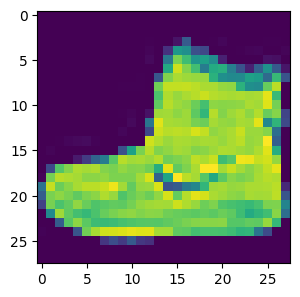

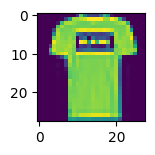

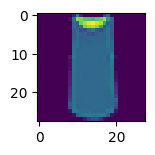

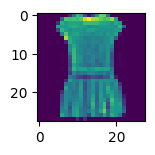

In [9]:
def mostra_imagem_vector(imagens, numero_imagens= 1, fig_size =(15,5)):

 numero_imagens = min(numero_imagens, len(imagens))

 plt.figure(figsize=fig_size)

 for z in range(numero_imagens):
  plt.subplot(1, numero_imagens, z+1)
  plt.imshow(imagens[z])

  plt.show()


mostra_imagem_vector(x_train, 4)



In [10]:
target = 1
image = x_train[target]
coluna = y_train[target]
for z in range (25):
  print( ['-' if pixel == 0 else '@' for pixel in image[z]] )

print(f'Label: {coluna}')

['-', '-', '-', '-', '-', '@', '-', '-', '-', '-', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '-', '-', '-', '-', '-', '-', '-', '-']
['-', '-', '-', '@', '-', '-', '-', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '-', '-', '-']
['-', '-', '-', '-', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '-', '-', '-']
['-', '-', '-', '-', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '-', '-', '-']
['-', '-', '-', '-', '@', '@', '@', '@', '@', '@', '-', '@', '@', '-', '@', '@', '@', '@', '@', '-', '@', '@', '@', '@', '@', '@', '-', '-']
['-', '-', '-

tratamento dos dados

como queremos uma saida entre 0 e 1 logo vamos normlizar divindo por 1

In [11]:
x_train = x_train/255.0
x_teste = x_teste/255.0

agora esta normalizado visto que usamos numeros inteiros

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

vamos analizar o valor e o tipo da variavel, importante para saber qual modelos de deep learning vamos usar

In [13]:
int(y_train[10])
y_train[10]

np.uint8(0)

agora juntamos os bits da noss variavavel gerando uma concatenacao para poder dar como imput no perceptron, assim podemos comparar nosso rotulo com o valor previsto  

In [14]:
y_train_concatena = to_categorical(y_train, 10)
y_teste_concatena = to_categorical(y_teste, 10)

y_train_concatena[11]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

# Modelo perceprton

o que seria um perceptron basicamente uma espresão matetmatica que vai de forma binaria dizer apartir de entradas se o numero se parece ou nao, lembrando que esse modelo com um unico neuronio serve para estudo e nao para aplicacoes praticas como veremos logo seguir  

In [15]:
# flatten para a ajusar a imagem
# 1 neuronio na camada sendo ativado por relu -> a parte mais simples
# softmax para a saida de 10 classes ::

perceptron = Sequential([
    Flatten(input_shape=(28,28)),# -> tamanho pego na analise anterior
    Dense(1, activation='relu'),
    Dense(10, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


a compilaco do perceptron para otimizador adam

comparar como se relaciona com sgd

In [16]:
perceptron.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],)

verificacao de pesos e bias

In [17]:
perceptron.layers


[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

usamos valores em binarios pois estamos usando essa aplicacao em um dataset de imagem para a anlise de matriz binaria se torna interessate

In [18]:
peso_de_entrada = perceptron.layers[1].get_weights()[0]

entrada_do_bias = perceptron.layers[1].get_weights()[1]

peso_de_entrada2 = perceptron.layers[2].get_weights()[0][0]

entrada_do_bias2 = perceptron.layers[2].get_weights()[1]

In [19]:
print(f'''
Nº de Pesos na Camada de Entrada (input): {len(peso_de_entrada)} -> n pesos aqui
Nº de Bias de Entrada (input): {len(entrada_do_bias)} -> 1 bias

Nº de Pesos na Camada Oculta (hidden 1): {len(peso_de_entrada2)} -> 10 pesos
Nº de Bias na Camada Oculta (hidden 1): {len(entrada_do_bias2)} -> 10 bias
''')


Nº de Pesos na Camada de Entrada (input): 784 -> n pesos aqui
Nº de Bias de Entrada (input): 1 -> 1 bias

Nº de Pesos na Camada Oculta (hidden 1): 10 -> 10 pesos
Nº de Bias na Camada Oculta (hidden 1): 10 -> 10 bias



backpropagation mode !!!!

vamos fazer o treinamento da nossa rede

podemos ver como esta  sendo a acuracia e perda na nossa rede ou do perceptron

In [33]:
bias = perceptron.layers[1].get_weights()[1]
print(f'Bias #{0}= bias{bias}')

#nivel de treinamento do nosso perceptron
# como estamos usando um neuronio vc nao pode esperar muita coisa.....
for z in range(10):
  perceptron.fit(x_train, y_train_concatena, epochs=1, validation_data=(x_teste, y_teste_concatena))
  bias = perceptron.layers[1].get_weights()[1]
  print(f'Bias #{z+1} = {bias}')



Bias #0= bias[2.3722448]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3866 - loss: 1.4266 - val_accuracy: 0.3909 - val_loss: 1.4298
Bias #1 = [2.5375547]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3861 - loss: 1.4298 - val_accuracy: 0.3923 - val_loss: 1.4262
Bias #2 = [2.6904993]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3895 - loss: 1.4218 - val_accuracy: 0.3918 - val_loss: 1.4211
Bias #3 = [2.8417788]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3863 - loss: 1.4190 - val_accuracy: 0.3956 - val_loss: 1.4163
Bias #4 = [2.9743924]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3904 - loss: 1.4110 - val_accuracy: 0.3933 - val_loss: 1.4141
Bias #5 = [3.089242]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3926 - loss: 1.4075 - val_accuracy: 0.3948 - val_loss: 1.4139
Bias #6 = [3.207505]
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3936 - loss: 1.4033 - val_accuracy: 0.3988 - val_loss: 1.4076
Bias #7 = [3

# adicionando um MLP para uma melhor performace

In [56]:
mlp = Sequential()
mlp.add(Flatten(input_shape=(28,28)))
mlp.add(Dense(124)) # pois como nosso data set tem mais de 50.000 imagens
mlp.add(Dense(10, activation='softmax'))

#compilacao do mlp

mlp.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'],)





In [59]:
history = mlp.fit(x_train, y_train_concatena, epochs=15, validation_data=(x_teste, y_teste_concatena))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8600 - loss: 0.4003 - val_accuracy: 0.8400 - val_loss: 0.4572
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8612 - loss: 0.3985 - val_accuracy: 0.8391 - val_loss: 0.4610
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8603 - loss: 0.3950 - val_accuracy: 0.8361 - val_loss: 0.4713
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8594 - loss: 0.3968 - val_accuracy: 0.8140 - val_loss: 0.5111
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8607 - loss: 0.3983 - val_accuracy: 0.8366 - val_loss: 0.4749
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8601 - loss: 0.3931 - val_accuracy: 0.8416 - val_loss: 0.4600
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8627 - loss: 0.3878 - val_accuracy: 0.8375 - val_loss: 0.4698
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8635 - loss: 0.387

In [23]:
from tensorflow.keras.optimizers import SGD

In [49]:
mlp = Sequential()
mlp.add(Flatten(input_shape=(28,28)))
mlp.add(Dense(124)) # pois como nosso data set tem mais de 50.000 imagens
mlp.add(Dense(10, activation='softmax'))

#compilacao do mlp

mlp.compile(optimizer=SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'],)





In [60]:
history2 = mlp.fit(x_train, y_train_concatena, epochs=15, validation_data=(x_teste, y_teste_concatena))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8649 - loss: 0.3788 - val_accuracy: 0.8409 - val_loss: 0.4599
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8644 - loss: 0.3823 - val_accuracy: 0.8403 - val_loss: 0.4675
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8644 - loss: 0.3789 - val_accuracy: 0.8410 - val_loss: 0.4565
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8661 - loss: 0.3761 - val_accuracy: 0.8435 - val_loss: 0.4494
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8658 - loss: 0.3762 - val_accuracy: 0.8260 - val_loss: 0.4963
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8654 - loss: 0.3798 - val_accuracy: 0.8341 - val_loss: 0.4676
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8675 - loss: 0.3767 - val_accuracy: 0.8424 - val_loss: 0.4639
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8689 - loss: 0.3716 

# comparacao com otimizadores Stocratic grandient discendent e ADAM

In [61]:
def plot_historico(history):
    plt.figure(figsize=(12,5))

     # Plot da acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treinamento')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title('Acurácia')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()

    # Plot da perda
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Loss')
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

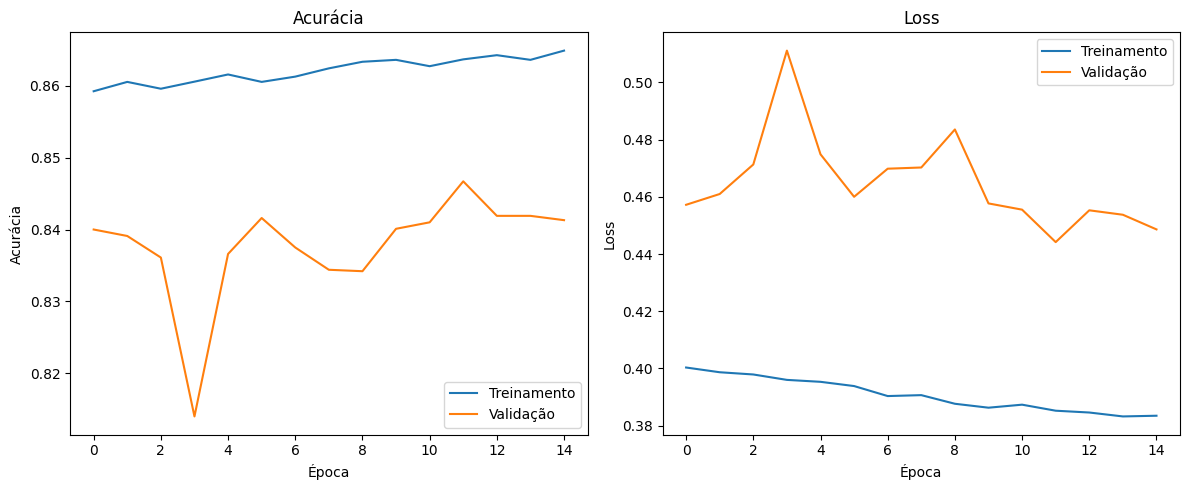

In [62]:
plot_historico(history)

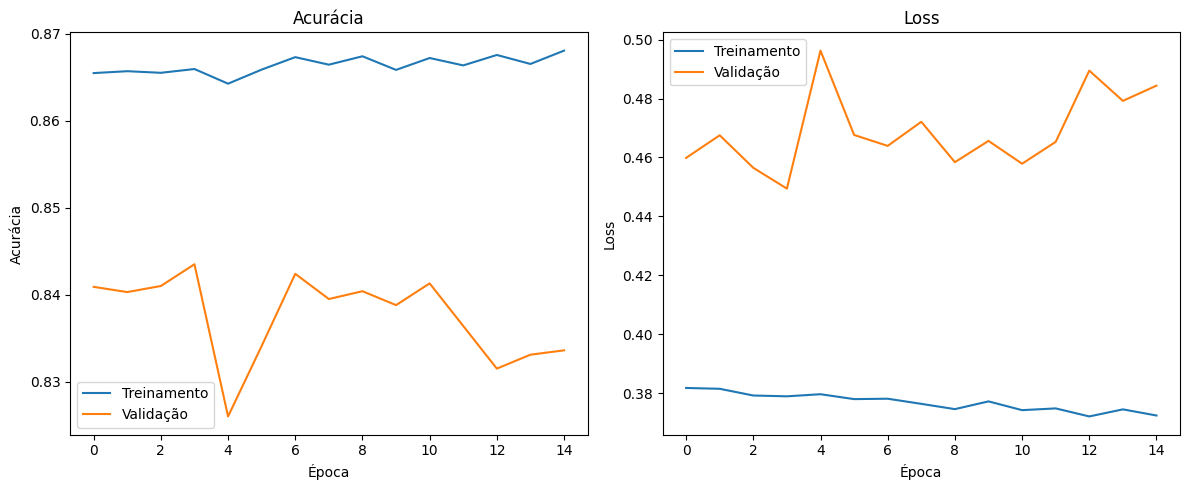

In [63]:
plot_historico(history2)

uma comparacao que vemos a performace das redes com otimizadores diferentes, um para o sgd e adam

uma comparacao interessante foi que com 1000 neuronios estava dando overfit pelo plot logo resolvi aplicar 1/2 -> dos neuronios

com 500 tambem deu overfit, com o uso de 250 tambem obitive overfit tentando novamente com 124 neuronis tambem obitive overfit.

bem eu resolvi analisar o valor da tabela com os dados de acuracia altas, mas estou vendo que provavelmente tenha que organizar como o perceptron esta aprendendo estou usando atualmente 0.01 de taxa de learning mas posso aumentar ate 1.0 mas adam funiona nessa taxa logo devo abordar esse problema de uma outra forma, lembrando que estou usando dois otimizadores para o decorrer, logo vou tentar abordar ou poderia usar outras formas de aprendizado profundo, bem ainda nao fiz o piperline tanto do sgd como do adam, tenho que fazer uma quantidades de testes maiores para poder analizar de forma mais precisa e coerente isso.

o numero de epochs que foi usado nos testes com 1000,500 foram com 10 epochs, mas apartir de 250 foi com 15 epochs, talvez devo refazer testes com o intervalo de 10 a 15 epochs, lembrando que isso foi feito usando como base livros de aplicacoes de ml como AIengenner, logo pode variar dependendo do contexto mas como com o aumento de epochs o resultado se manteve estavel ou seja o problema esta mais da forma que o perceptron foi instanciado.



if you have a thinking you have to write
(leslie lamport) - computer scientist
